 # FINAL PROJECT - TOPIC A

### Importing all packages required for the three exercises 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from keras.utils.vis_utils import plot_model

import numpy as np
import os

%matplotlib inline 
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import IPython
from PIL import Image

Using TensorFlow backend.


# 

# EXERCISE 1

# 

We first import the MNIST dataset and we create the training and test sets.  

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#importing the MNIST dataset from keras

We keep originals sets in new ones so we can use them later

In [3]:
X_train2 = X_train
X_test2 = X_test
y_train2 = y_train
y_test2 = y_test

To create our model we first need to reshape the data sets a bit to be one dimensional and to be usable for the probabilities:

In [4]:
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test  = X_test.reshape((X_test.shape[0], 28*28))
#we need both X to be unidimensional vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
#as the model estimates probabilities, Y has to be binary

We need y to be binary and we'll have vectors like this for instence : [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.], here the number is 5. 

### 1) Model with architecture A 

### a) First we create a simple neural network model, using sigmoid activation function.

#### i) Creation and compilation of the model : 

In [6]:
num_classes = 10
xi      = Input(shape=(28*28,))
xo      = Dense(num_classes)(xi)
yo      = Activation('sigmoid')(xo)   #We try to use the sigmoid function
model1   = Model(inputs=[xi], outputs=[yo])

model1.summary()

model1.compile(loss='categorical_crossentropy', 
              optimizer='adam',  
              metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


1) Building the model : 

In xi line which is the input layer, we just specify the dimension of an image, 784 pixels per image because we have flattened images. In xo which is the dense layer we just say how many classes we have in our model, here it's 10 classes.<br>
In yo which is how we'll get the output from the dense layer, we specify the activation function. Here we'll try to use the sigmoid function. <br>
In the last line we just define our model by specifying the input and output layers and we display the architecture by doing a model.summary().

2) Compiling the model: 

We need to compile the model by saying which loss function the model will minimized. Here we took the categorical crossentropy loss which is often used. <br>
Then we need to choose the optimizer and we took the Adam one (which is like a gradient descent method, based on adaptive estimation of first-order and second-order moments).<br>
And finally, we need to choose the metric and we used the accuracy. 

#### ii) Training the neural network

In [7]:
history = model1.fit(X_train, y_train,
          epochs=5,
          verbose=1,
          validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 3s 54us/sample - loss: nan - accuracy: 0.1818 - val_loss: nan - val_accuracy: 0.0978
Epoch 2/5
54000/54000 [==============================] - 2s 33us/sample - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 3/5
54000/54000 [==============================] - 2s 30us/sample - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 4/5
54000/54000 [==============================] - 2s 30us/sample - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 5/5
54000/54000 [==============================] - 2s 30us/sample - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978


We fit our model by indicating our training sets. We'll run 5 epochs and the verbose parameter of 1 is just how the log output is printed in the console during training. Finally the validation split here indicates how much of the training set we take to validate. Here it's 10%. 

#### iii)  Evaluating network performance on the MNIST test set

In [8]:
score = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: nan
Test accuracy: 0.098


Here we evaluate the performances of our model on the test set with verbose 0, which means that we don't print all the steps. And then we just print the test loss and the test accuracy. 

=> The sigmoid function (logistic) as activation function gives very poor results (less than 10% accuracy). This model is not good, so we are now going to try with a softmax activation function: 

### b) Simple neural network model, using Softmax activation function

#### i) Creation and compilation of the model 

In [9]:
num_classes = 10
xi      = Input(shape=(28*28,))
xo      = Dense(num_classes)(xi)
yo      = Activation('softmax')(xo)
model2   = Model(inputs=[xi], outputs=[yo])

model2.summary()

model2.compile(loss='categorical_crossentropy', 
              optimizer='adam',  
              metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Here we do exactly the same as in the a)i) but instead of having a sigmoid activation function we have a softmax one.  

#### ii) Visualization of the model

VISUAL REPRESENTATION


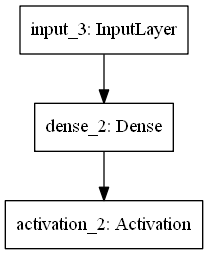

In [10]:
print('VISUAL REPRESENTATION')
tf.keras.utils.plot_model(model2, to_file='my_model.png')

This is the illustration of our Architecture A. A simple neural network with 3 layers, an imput layer,an hidden layer and an ouput layer. In the input layer we have the flattened image, in the the hidden layer we have the linear combinaison of the input on which we'll apply the activation function and we'll get the output. The output here will be a vector of size 10, with a probabitity associated with each number. If we have = [0,0,0,0,0,1,0,0,0,0] the model predicted 5. 

#### iii) Training the neural network

In [11]:
history = model2.fit(X_train, y_train,
          epochs=20,
          verbose=1,
          validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 41us/sample - loss: 10.1403 - accuracy: 0.8347 - val_loss: 4.8395 - val_accuracy: 0.8968
Epoch 2/20
54000/54000 [==============================] - 2s 29us/sample - loss: 6.2298 - accuracy: 0.8753 - val_loss: 5.3489 - val_accuracy: 0.8883
Epoch 3/20
54000/54000 [==============================] - 2s 30us/sample - loss: 5.7551 - accuracy: 0.8803 - val_loss: 6.0718 - val_accuracy: 0.8685
Epoch 4/20
54000/54000 [==============================] - 2s 30us/sample - loss: 5.4910 - accuracy: 0.8829 - val_loss: 5.0357 - val_accuracy: 0.8943
Epoch 5/20
54000/54000 [==============================] - 2s 30us/sample - loss: 5.5950 - accuracy: 0.8826 - val_loss: 6.1663 - val_accuracy: 0.8668
Epoch 6/20
54000/54000 [==============================] - 2s 30us/sample - loss: 5.2780 - accuracy: 0.8867 - val_loss: 4.4829 - val_accuracy: 0.8992
Epoch 7/20
54000/54000 [==============================] 

Here we do the same as before, in the a)ii) we have just 20 epochs instead of 3, so we can have a better accuracy.

####  iv) Evaluate network performance on the MNIST test set 

In [12]:
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 5.8286510614291895
Test accuracy: 0.9005


We evaluated our model on the test set and we can see that the accuracy is way higher with the softmax function than with the sigmoid. We are between 80% and 90% of accuracy which means that our model is pretty strong. 

#### v) Plotting accuracy and loss evolution

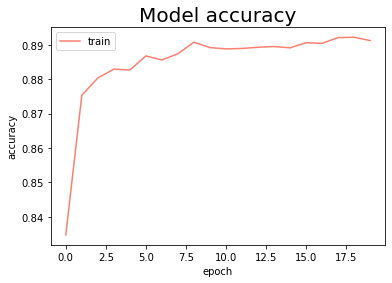

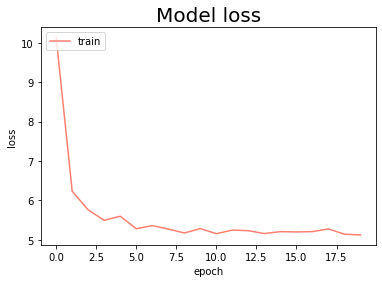

In [16]:
# plot history for accuracy
plt.plot(history.history['accuracy'], color = 'salmon')
plt.title('Model accuracy', size = 20)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot history for loss
plt.plot(history.history['loss'], color = 'salmon')
plt.title('Model loss', size = 20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Here we plot the evolution of the accuracy and the loss function of the model. The accuracy increases with the number of epoch and the loss decreases with the number of epoch. We could have put 13/14 epochs it would have been almost the same accuracy as the one with 20 epoch. 

#### vi) Vizualisation of one prediction  

Here we create a Test function that will print the model prediction and the image and, this for the 10000 images of the test sample:

In [17]:
def test_function(a):
    if a > 9999 or a < 0:
        print('There are 10 000 values in the test sample, please enter a value between 0 and 9999')
        return None
    else:
        test_image = X_test2[a, :]
        img = Image.fromarray(test_image)
        img.save('test.png')

        test_image2 = test_image.reshape(1, 784)
        test_result = model2.predict(test_image2)
        for i in range(10):
            if test_result[0, i] == 1:
                 print("The model predicted",i)
        print('\n', 'The actual image was:')
        return IPython.display.Image('test.png', width = 200, height = 200)

In [18]:
#We can test for different images, here we tried with the 4765th one

test_function(4765)

The model predicted 6

 The actual image was:


In [21]:
#We can test for different images, here we tried with the 475th one

test_function(475)

The model predicted 4

 The actual image was:


# 

### 2) Model with architecture B : CNN (Convolutional Neural Networks)

For the CNN we reshape each image from (60000,28, 28) to (60000,28, 28, 1) because Keras requires the fourth dimension. 

In [22]:
X_train3 = X_train2.reshape((60000, 28, 28, 1))
X_test3 = X_test2.reshape((10000, 28, 28, 1))

#### i) Creation and compilation of the model 

In [23]:
model3 = Sequential([
    Conv2D(32, 3, activation='relu',input_shape=(28, 28, 1), padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(units=10, activation='softmax')
])

model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                31370     
Total params: 50,186
Trainable params: 50,186
Non-trainable params: 0
____________________________________________________

To build our CNN model we used a Keras Sequential model which is a linear stack of layers. We chose this one because it's often used. <br>
The operation in a CNN is the convolution, i.e. a feature extraction which is here a fitered image that will help to reduce the number of parameters(as we can see above). That is what the second layer Conv2 is doing. In this layer the kernel size is 3x3 which is pretty common and we'll have 32 output of this kernel size. 

Since convolution implies an increase of the dimension we need to pool and reduce the dimensionality of the data. That's what we are doing in the third layer with Maxpooling2D.<br>
We chose to do it after that a second convolution layer (even if here this layer is not necessarily usefull and can slow down the calculation). This second convoltion layer we'll be the same as before except that for this layer will ha e 64 filters. We also do a pooling after to reduce de dimension.

After, we just have to flatten and put it to the dense layer with a softmax function so we have the ouput layer with the probability of each number. 

In [24]:
model3.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

Here we compile the model like in the first part. 

##### ii) Visualization of the model

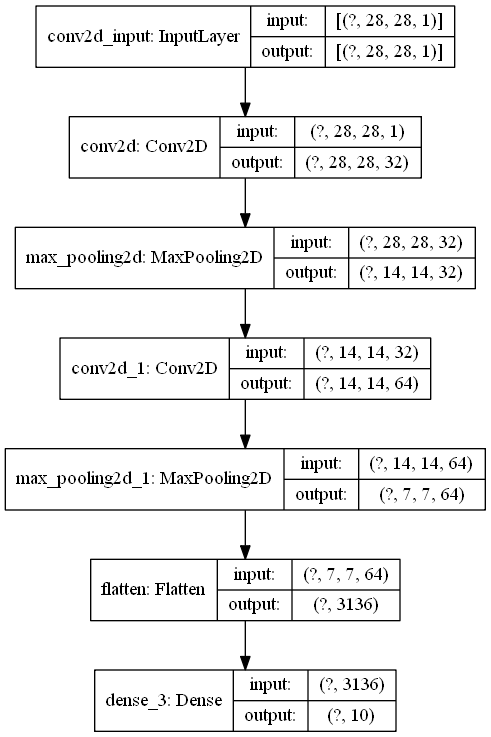

In [25]:
tf.keras.utils.plot_model(model3, to_file='my_model.png', show_shapes=True)

We can see here the input layer, the 2 convolutional layers, the pooling layers associated with each of these convolutional layers, the flatten layer and the dense layer that will give the output. 

#### iii) Training the neural network 

In [26]:
history = model3.fit(X_train3, to_categorical(y_train2), epochs = 3, verbose = 1)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 32s 535us/sample - loss: 0.2707 - accuracy: 0.9500
Epoch 2/3
60000/60000 [==============================] - 31s 523us/sample - loss: 0.0646 - accuracy: 0.9799- loss: 0.064
Epoch 3/3
60000/60000 [==============================] - 32s 538us/sample - loss: 0.0533 - accuracy: 0.9842


We train the model with 3 epochs here. Looking at the accuracy maybe 2 epochs would have been enough, but for these choices we looked at what was most used.

#### iv) Evaluating network performance on the test set 

In [28]:
score = model3.evaluate(X_test3, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05331819589917868
Test accuracy: 0.9856


We have an accuracy of 98% here. The CNN gives a strong model, stronger than the simple neural network. 

#### v) Plotting accuracy and loss evolution

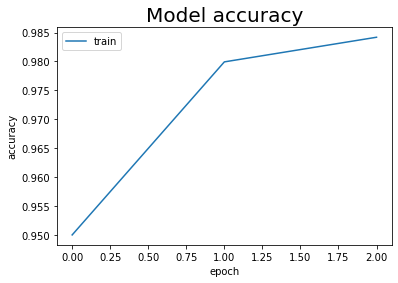

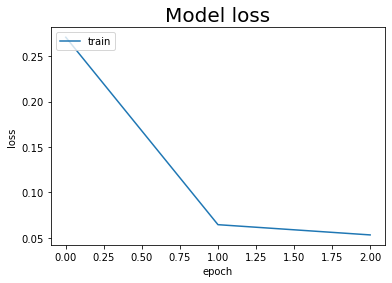

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('Model accuracy', size = 20)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model loss', size = 20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

These graphs shows us that the difference of accuracy between 1 and 2 epochs is high but between 2 and 3 epochs the difference is low. Maybe we could have done only 2 epochs. 

#### vi) Vizualisation of one prediction  

Here we have a similar Test function as the one before.

In [31]:
def test_function2(a):
        if a > 9999 or a < 0:
            print('There are 10 000 values in the test sample, please enter a value between 0 and 9999')
            return None
        else:
            test_image = X_test2[a, :]
            test_image2 = X_test3[a, :]
            test_image2 = test_image2.reshape(1, 28, 28, 1)
            test_result = model3.predict(test_image2)
            argmax_value = np.argmax(test_result)
            print('The model predicted:',argmax_value)
            print('\n', 'The actual image was :')
            plt.imshow(test_image)
            plt.show()

The model predicted: 9

 The actual image was :


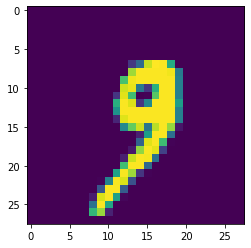

In [32]:
test_function2(1000)

The model predicted: 6

 The actual image was :


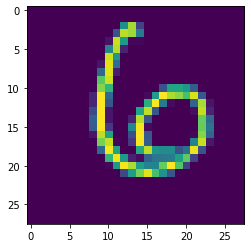

In [33]:
test_function2(100)

The model predicted: 1

 The actual image was :


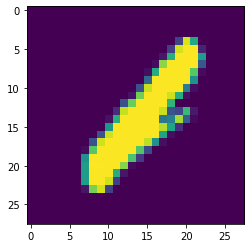

In [35]:
test_function2(1900)

# 

# EXERCISE 2

# 

## 1) Creating the Data 

### a) Training set

#### Creating the train sample with 30 000 random images and 30 000 handwritten number images

In [36]:
images = []
for i in range(30000): 
    randnums_i = np.random.randint(0, 255, size=(28,28))
    images.append(randnums_i)

img_grayscale = np.array(images)
num_grayscale = X_train2[:30000,:]   #We keep the 30000 first ones of the X_train in the first exercise
X_train4 = np.concatenate((img_grayscale, num_grayscale))
X_train4.shape

(60000, 28, 28)

We created an array that containes 30000 random images of size 28x28 that we called "img_grayscale". And we kept the 30000 first images of the training data from the first exercise. Finally we concatenate the 2 samples so we can have the training sample with the 60000 images. 

##### Creating the train label sample, with 30 000 0 for the random images, and 30 000 1 for the handwritten numbers

In [38]:
num = np.full(30000, 1)
not_num = np.full(30000, 0)
y_train_num = np.concatenate((not_num, num))
y_train_num.shape

(60000,)

We assigned the label 0 for the random images that we created and 1 for the handwritten numbers. We thus have the Y train sample. 

### b) Test set 

##### Creating the test sample with 10 000 random images and 10 000 handwritten number images

In [39]:
images_test = []
for i in range(10000): 
    randnums_i = np.random.randint(0, 255, size=(28,28))
    images_test.append(randnums_i)
img_test_grayscale = np.array(images_test)
num_test_grayscale = X_train2[:10000,:]
X_test_num = np.concatenate((img_test_grayscale, num_test_grayscale))

We use the same method as the one used for the training sample. 

##### Creating the test label sample, with 10 000 0 for the random images, and 10 000 1 for the handwritten numbers

In [40]:
num_test = np.full(10000, 1)
not_num_test = np.full(10000, 0)
y_test_num = np.concatenate((not_num_test, num_test))

### c) Shuffle of the Data

##### Shuffling the full sample to get 60 000 train samples and 20 000 test samples

In [41]:
X_num = np.concatenate((X_train4, X_test_num))
y_num = np.concatenate((y_train_num, y_test_num))

In [42]:
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y_num, test_size = 0.25)

We decided to shuffle the images in the sample. We thus have the finals training sets and test sets. 

## 2) CNN Model 

In this exercise the method will be the same as in the exercice one, the only diffence is that we'll have two possible output : 0 or 1. So we'll not comment everything but just the small differences with the previous exercise. 

In [43]:
X_train2_num = X_train_num.reshape((60000, 28, 28, 1))
X_test2_num = X_test_num.reshape((20000, 28, 28, 1))

To do the CNN we need first to reshape the samples. 

### a) Creation and compilation of the model 

In [47]:
model_num = Sequential([
    Conv2D(32, 3, activation='relu',input_shape=(28, 28, 1), padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(units=1, activation='sigmoid')
])

model_num.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3137      
Total params: 21,953
Trainable params: 21,953
Non-trainable params: 0
__________________________________________________

Compare to the first exercise we use here a sigmoid activation function for the dense layer because we had more accuracy. 

In [50]:
model_num.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])

Since the output is either O or 1 we use here "binary_crossentropy as a loss function instead of the categorical one that we used before. 

### b) Visualization of the model

VISUALIZATION


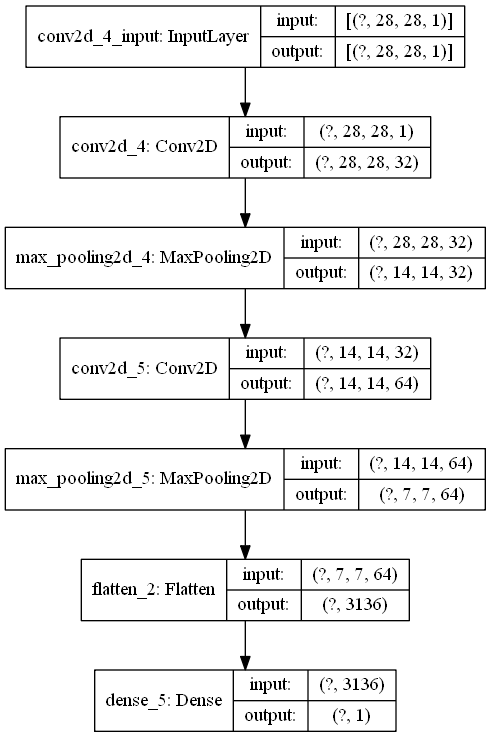

In [51]:
print('VISUALIZATION')
tf.keras.utils.plot_model(model_num, to_file='my_model.png', show_shapes=True)

### c) Training the neural network 

In [52]:
history = model_num.fit(X_train2_num, y_train_num, epochs = 2, verbose = 1)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 33s 543us/sample - loss: 0.0468 - accuracy: 0.9986
Epoch 2/2
60000/60000 [==============================] - 32s 539us/sample - loss: 1.2023e-09 - accuracy: 1.0000


We only do 2 epochs since we have an accuracy of 100%. We could have done 1 epoch or a simple neural network. 

### d) Evaluate network performance on the test set 

In [53]:
score = model_num.evaluate(X_test2_num, y_test_num, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 9.696773826778907e-19
Test accuracy: 1.0


### e) Plotting accuracy and loss evolution

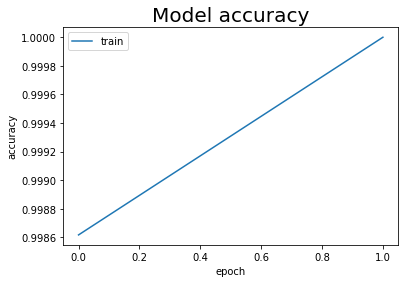

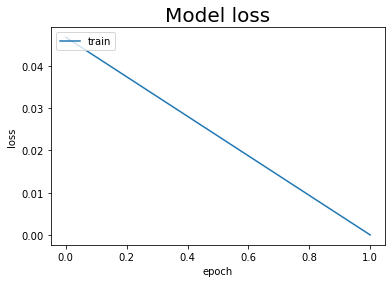

In [55]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('Model accuracy', size = 20)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model loss', size = 20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The graphs illustrate that one epoch would have been enough and maybe a simple neural network could have been enough and probably faster. 

### f) Vizualisation of one prediction  

In [56]:
def test_function3(a):
        if a > 19999 or a < 0:
            print('There are 20 000 values in the test sample, please enter a value between 0 and 19999')
            return None
        else:
            test_image = X_test_num[a, :]
            test_image2 = X_test2_num[a, :]
            test_image2 = test_image2.reshape(1, 28, 28, 1)
            test_result = model_num.predict(test_image2)
            if test_result == 1:
                print('The model detected handwriting')
            else:
                print('The model detected no handwriting')

            print('The actual image was :')
            plt.imshow(test_image, cmap=plt.cm.binary)
            plt.show()

The model detected handwriting
The actual image was :


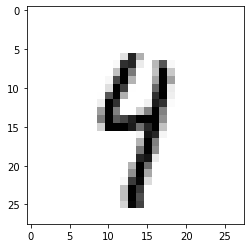

In [57]:
test_function3(12)

The model detected handwriting
The actual image was :


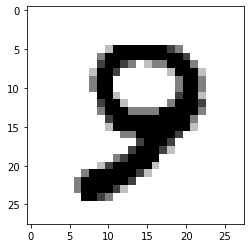

In [58]:
test_function3(125)

The model detected no handwriting
The actual image was :


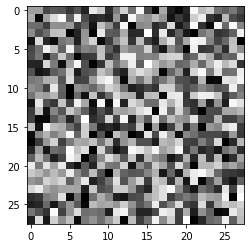

In [59]:
test_function3(1289)

# 

# EXERCISE 3

# 

For the third exercice, the choice of the dataset was left to us.
We looked through datasets on websites like DataWorld or Kaggle to find an interesting one. We found one on Kaggle which was made up of photos of bees, wasps, other insects and other non insects.
Here is the link to the Kaggle dataset:
https://www.kaggle.com/jerzydziewierz/bee-vs-wasp

Given the dataset we chose, the model we wanted to create was a classification model, to know if a given photo was a bee, a wasp, another insect, or neither of the three.

To achieve this we have 3183 photos of bees, 4943 photos of wasps, 2439 photos of other insects and 856 random photos of other things (going from dogs, to people, all the way to hot dogs).
The photos we have are colored photos, not grayscaled like previously. They are thus at the RGB format, with 3 layers of matrices for each photo.

The steps we have to take to get our model are:
- clean and prepare the data
- create the CNN model (very similar to the CNN from the first exercice, adapted to fit the 3 dimensional input shape)
- fit and evaluate the model

##### Resize function

The first step was to resize the data, we thus created a function that would take all photos from a file, resize them to a chosen number of pixels using the PIL library, and save them into another given file.

For our dataset, we wanted at first to estimate our model with 256 x 256 photos, as was advised, but it was too much for our computers, we thus settled for 128 x 128.

Our resized dataset is available here on a Google Drive:
https://drive.google.com/drive/folders/1n_-37dCrCxwDksRyUXBh5FbrHDpCqhb4?usp=sharing

In [60]:
def resize2(inPath, outPath, x, y):
# the arguments of the function are the path of the current photos,
# the path of the output file, and the sizes of the output photos 
    inPath = inPath
    outPath = outPath
    
    for imagePath in os.listdir(inPath):
        inputPath = os.path.join(inPath, imagePath)
        img = Image.open(inputPath)
        fullOutPath = os.path.join(outPath, 'resize_'+imagePath)
        img.resize((x,y), Image.ANTIALIAS).save(fullOutPath)
        
    print(fullOutPath)

##### Transformation into array function

After resizing the photos, they had to be transformed into an array type, for Keras to be able to understand them.
The function below was created to take photos from a file (output file of the previous function), read them as a python image as an array. We chose to normalize the values of the pixels to reduce computation time, given the higher degree of information in the photos compared to the MNIST.
The output of the function is a list, the transformation to a numpy array is made later, it reduces computation time that way.

In [61]:
def toarray(inPath, x, y):

    inPath = inPath   
    empty = []
    for imagePath in os.listdir(inPath):
        inputPath = os.path.join(inPath, imagePath)
        img = Image.open(inputPath)
        image = np.asarray(img)
        image = (image /255)-0.5
        if image.shape == (x, y, 3):
            empty.append(image)
        else:
            pass
    return empty

##### Preparing the bees

Applying the functions to the bees photos, and creating the bees label array.<br>
Bees will be category 1.

In [ ]:
resize2("D:/0_AMSE/0-AMSE/Mag_3/Prediction_Method/Bees_Wasps/kaggle_bee_vs_wasp/bee",
        "D:/0_AMSE/0-AMSE/Mag_3/Prediction_Method/Bees_Wasps/kaggle_bee_vs_wasp/bee_resized",
        128,
        128)

In [62]:
bees1 = toarray("D:/0_AMSE/0-AMSE/Mag_3/Prediction_Method/Bees_Wasps/kaggle_bee_vs_wasp/bee_resized",
                128,
                128)
bees1 = np.array(bees1)
print(bees1.shape)
bees1_label = np.ones(len(bees1))
print(bees1_label.shape)

(3182, 128, 128, 3)
(3182,)


##### Preparing the wasps

Applying the functions to the wasps photos, and creating the wasps label array.<br>
Wasps will be category 2.

In [ ]:
resize2("D:/0_AMSE/0-AMSE/Mag_3/Prediction_Method/Bees_Wasps/kaggle_bee_vs_wasp/wasp",
        "D:/0_AMSE/0-AMSE/Mag_3/Prediction_Method/Bees_Wasps/kaggle_bee_vs_wasp/wasp_resized",
        128,
        128)

In [63]:
wasps1 = toarray("D:/0_AMSE/0-AMSE/Mag_3/Prediction_Method/Bees_Wasps/kaggle_bee_vs_wasp/wasp_resized",
                128,
                128)
wasps1 = np.array(wasps1)
print(wasps1.shape)
wasps1_label = np.full(len(wasps1), 2)
print(wasps1_label.shape)

(4941, 128, 128, 3)
(4941,)


##### Preparing the other insects

Applying the functions to the other insects photos, and creating the other insects label array.<br>
Other insects will be category 0.

In [ ]:
resize2("D:/0_AMSE/0-AMSE/Mag_3/Prediction_Method/Bees_Wasps/kaggle_bee_vs_wasp/other_insect",
      "D:/0_AMSE/0-AMSE/Mag_3/Prediction_Method/Bees_Wasps/kaggle_bee_vs_wasp/other_insect_resized",
      128,
      128)

In [64]:
other_insects1 = toarray("D:/0_AMSE/0-AMSE/Mag_3/Prediction_Method/Bees_Wasps/kaggle_bee_vs_wasp/other_insect_resized",
                128,
                128)
other_insects1 = np.array(other_insects1)
print(other_insects1.shape)
other_insects1_label = np.full(len(other_insects1), 0)
print(other_insects1_label.shape)

(2439, 128, 128, 3)
(2439,)


##### Preparing the Non-insects

Applying the functions to the non insects photos, and creating the non insects label array.<br>
Non insects will be category 3.

In [ ]:
resize2("D:/0_AMSE/0-AMSE/Mag_3/Prediction_Method/Bees_Wasps/kaggle_bee_vs_wasp/other_noinsect",
      "D:/0_AMSE/0-AMSE/Mag_3/Prediction_Method/Bees_Wasps/kaggle_bee_vs_wasp/other_noinsect_resized",
      128,
      128)

In [65]:
other_noinsects1 = toarray("D:/0_AMSE/0-AMSE/Mag_3/Prediction_Method/Bees_Wasps/kaggle_bee_vs_wasp/other_noinsect_resized",
                128,
                128)
other_noinsects1 = np.array(other_noinsects1)
print(other_noinsects1.shape)
other_noinsects1_label = np.full(len(other_noinsects1), 3)
print(other_noinsects1_label.shape)

(853, 128, 128, 3)
(853,)


##### Preparing full sample

Concatenating all four samples, as well as the labels arrays, in the same order, to prepare for the train and test splits

In [66]:
full_sample = np.concatenate((bees1, wasps1, other_insects1, other_noinsects1), axis = 0)
full_sample.shape

(11415, 128, 128, 3)

In [67]:
full_sample_label = np.concatenate((bees1_label, wasps1_label, other_insects1_label, other_noinsects1_label))
full_sample_label.shape

(11415,)

##### Splitting full sample into training and test

Using train_test_split from Scikit Learn to get our tests and training samples

In [68]:
X_train_bees, X_test_bees, y_train_bees, y_test_bees = train_test_split(full_sample, full_sample_label, test_size = 0.2)

##### Creating model

We use the same basis than the CNN model from the first exercice, just having to change a few parameters to fit the RGB format of our data this time.

In [69]:
model_bees = Sequential([
    Conv2D(32, (3, 3), activation='relu',input_shape=(128, 128, 3), padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=4, activation='softmax')
])

model_bees.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 262148    
Total params: 281,540
Trainable params: 281,540
Non-trainable params: 0
________________________________________________

In [70]:
model_bees.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

##### Visualization of the model

VISUALIZATION


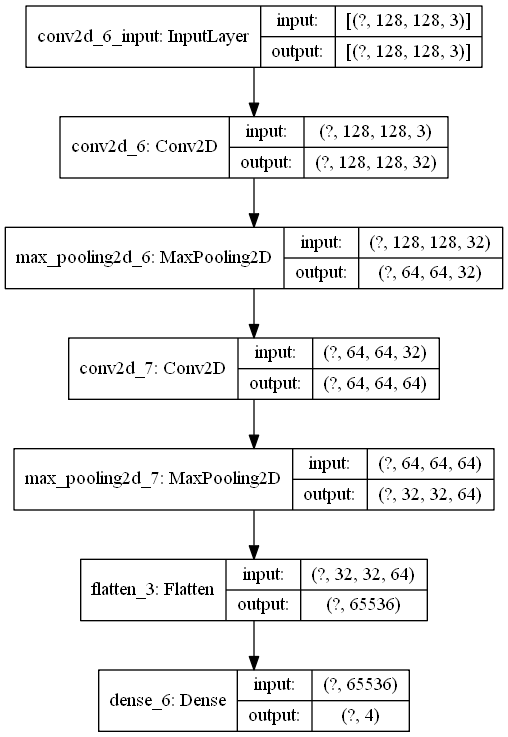

In [72]:
print('VISUALIZATION')
tf.keras.utils.plot_model(model_bees, to_file='my_model.png', show_shapes=True)

##### Fitting the model on our data

We use 3 epochs, from infos we found online, the fitting of the model is long for our model because of the coloured photos.

In [73]:
history = model_bees.fit(X_train_bees, to_categorical(y_train_bees), epochs = 3, verbose = 1)

Train on 9132 samples
Epoch 1/3
9132/9132 [==============================] - 103s 11ms/sample - loss: 0.9082 - accuracy: 0.6316
Epoch 2/3
9132/9132 [==============================] - 96s 10ms/sample - loss: 0.6977 - accuracy: 0.7207
Epoch 3/3
9132/9132 [==============================] - 92s 10ms/sample - loss: 0.5919 - accuracy: 0.7714


##### Testing the model

We get an accuracy of 80-90 percent on the train sample. <br>
On the test sample we get an accuracy of around 70-75 percent, which is quite decent, also given the reduced quality of our photos.

In [74]:
score = model_bees.evaluate(X_test_bees, to_categorical(y_test_bees), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.687697479926438
Test accuracy: 0.72448534


##### Plotting model history

The plot shows that accuracy went up, and loss went down during the training stage, which seems normal.

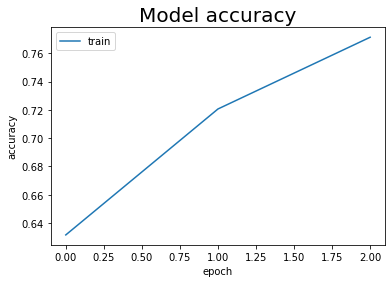

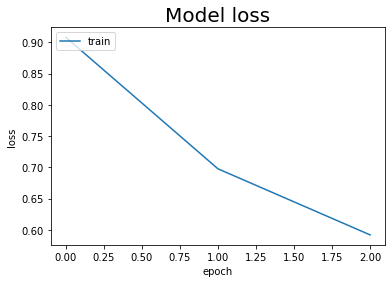

In [76]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('Model accuracy', size = 20)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model loss', size = 20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Test Function

The test function works similarly to the ones from the other models, it takes an image from the test sample, with an input from the user. <br>
Then it predicts an output with our model and gives a result.<br>
At the same time, the function shows the image and what it truly represented. <br>

The images are darker than in the original dataset, due to the normalization of the pixel values. <br>

When trying the function with different numbers, we get that sometimes the model is wrong, because of the reduced quality of our images, as well as the similarities between bees and wasps, but most of the times the model is correctly predicting.



In [77]:
def test_function_bees(a):
        if a > 2282 or a < 0:
            print('There are 2283 values in the test sample, please enter a value between 0 and 2282')
            return None
        else:
            test_image = X_test_bees[a, :]
            test_image2 = test_image.reshape(1, 128, 128, 3)
            test_result = model_bees.predict(test_image2)
            argmax_value = np.argmax(test_result)
            if argmax_value == 0:
                print('The model saw a non-bee and non-wasp insect')
            elif argmax_value == 1:
                print('The model saw a bee')
            elif argmax_value == 2:
                print('The model saw a wasp')
            else:
                print('The model saw no insect')
            print('\n', 'The actual image was:')
            
            
            label = y_test_bees[a]
            if label == 0:
                x = ("An insect")
            elif label == 1:
                x = ("A bee")
            elif label == 2:
                x = ("A wasp")
            else:
                x = ("A non insect")
            
            plt.imshow(test_image)
            plt.title(x)
            plt.show()

            if label == argmax_value:
                print('AWESOME, THE MODEL WAS RIGHT')
            else:
                print('TOO BAD... I HOPE WE WERE CLOSE TO THE TRUTH')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The model saw a wasp

 The actual image was:


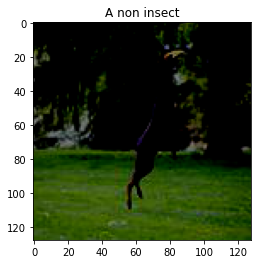

TOO BAD... I HOPE WE WERE CLOSE TO THE TRUTH


In [86]:
test_function_bees(284)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The model saw a wasp

 The actual image was:


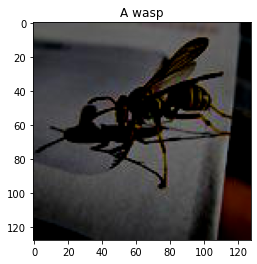

AWESOME, THE MODEL WAS RIGHT


In [81]:
test_function_bees(1559)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The model saw a wasp

 The actual image was:


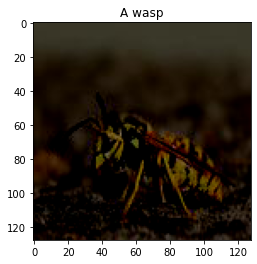

AWESOME, THE MODEL WAS RIGHT


In [83]:
test_function_bees(154)

## Maind links that we used to help us : 

- https://victorzhou.com/blog/keras-cnn-tutorial/
- https://www.kaggle.com/bavalpreet26/cnn-tutorial-keras-nb2
- https://teaching.pages.centralesupelec.fr/deeplearning-lectures-build/00-keras-mnist.html